# Extension Project

## Boston 311 Service Requests

#### Dataset Used:
2022 Service Requests from https://data.boston.gov/dataset/311-service-requests/resource/81a7b022-f8fc-4da5-80e4-b160058ca207. Has approximately 250k entries.

Analyze the most popular types of service requests in the neighborhoods of Boston. Determine how these types of service requests may differ based on the racial demographics of the neighborhoods.

In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_311 = pd.read_csv("311.csv")
df_311.head()

case_enquiry_id              open_dt            target_dt  \
0     101004113947  2022-01-02 11:46:09  2022-01-04 08:30:00   
1     101004113300  2022-01-01 00:27:58  2022-01-04 08:30:00   
2     101004113315  2022-01-01 01:58:00  2022-01-04 08:30:00   
3     101004113318  2022-01-01 02:25:00  2022-01-04 08:30:00   
4     101004113336  2022-01-01 03:37:00                  NaN   

             closed_dt  ontime case_status  \
0  2022-01-02 16:45:35  ONTIME      Closed   
1  2022-01-03 00:15:32  ONTIME      Closed   
2  2022-01-03 00:12:40  ONTIME      Closed   
3  2022-01-01 09:45:36  ONTIME      Closed   
4                  NaN  ONTIME        Open   

                                      closure_reason  \
0  Case Closed. Closed date : Sun Jan 02 16:45:35...   
1  Case Closed. Closed date : 2022-01-03 00:15:32...   
2  Case Closed. Closed date : 2022-01-03 00:12:40...   
3  Case Closed. Closed date : 2022-01-01 09:45:36...   
4                                                      

                  case_title                            subject  \
0        Empty Litter Basket            Public Works Department   
1        Parking Enforcement  Transportation - Traffic Division   
2        Parking Enforcement  Transportation - Traffic Division   
3                 PRINTED :             Public Works Department   
4  Loud Parties/Music/People           Boston Police Department   

                             reason  ... police_district  \
0               Highway Maintenance  ...              A1   
1  Enforcement & Abandoned Vehicles  ...              B2   
2  Enforcement & Abandoned Vehicles  ...             C11   
3                     Street Lights  ...             D14   
4                 Noise Disturbance  ...              B2   

                    neighborhood neighborhood_services_district     ward  \
0  Downtown / Financial District                              3        3   
1                        Roxbury                             13  Ward 12   
2                     Dorchester                              8  Ward 15   
3             Allston / Brighton                             15       22   
4                   Mission Hill                             11       10   

  precinct                      location_street_name location_zipcode  \
0     0306   INTERSECTION State St & Interstate 93 N              NaN   
1     1204                          89 Blue Hill Ave           2119.0   
2     1505                       4 Louis D Brown Way           2124.0   
3     2201  INTERSECTION Cambridge St & N Harvard St              NaN   
4     1008                            172 Fisher Ave           2120.0   

  latitude longitude                source  
0  42.3594  -71.0587  Citizens Connect App  
1  42.3222  -71.0774  Citizens Connect App  
2  42.3009  -71.0692      Constituent Call  
3  42.3594  -71.0587      Constituent Call  
4  42.3285  -71.1078      Constituent Call  

[5 rows x 29 columns]

In [3]:
print(df_311.keys())

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source'],
      dtype='object')


## Initial Analysis of Service Request Types

In [15]:
counts = df_311['type'].value_counts()
print(counts)

Parking Enforcement                            52592
Requests for Street Cleaning                   17752
Improper Storage of Trash (Barrels)            14512
Request for Pothole Repair                     12256
Missed Trash/Recycling/Yard Waste/Bulk Item    12226
                                               ...  
New Tree Warrantee Inspection                      1
Big Buildings Recycling (INTERNAL)                 1
Short Measure - Gas                                1
Mattress_Pickup                                    1
Water in Gas - High Priority                       1
Name: type, Length: 171, dtype: int64


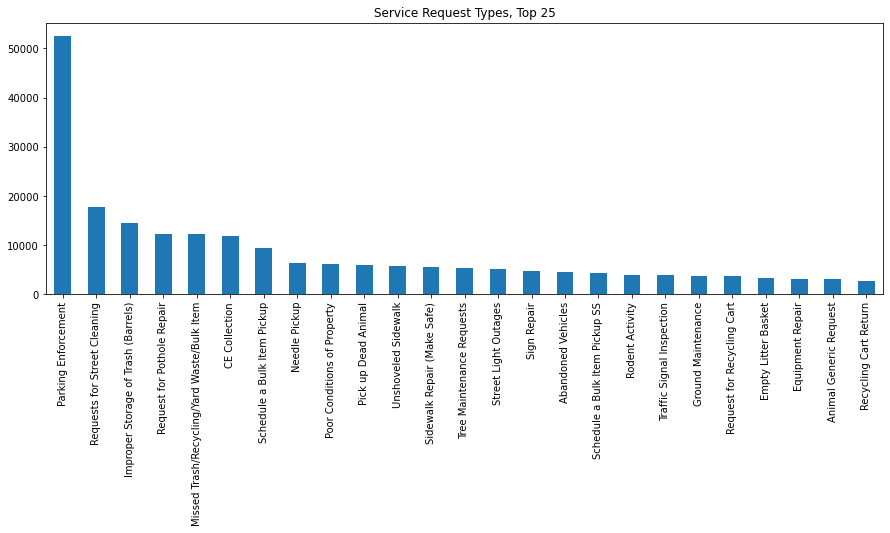

In [42]:
plt.figure(figsize=(15, 5))
counts.sort_values(ascending=False)[:25].plot(kind='bar')
plt.title("Service Request Types, Top 25")
plt.show()

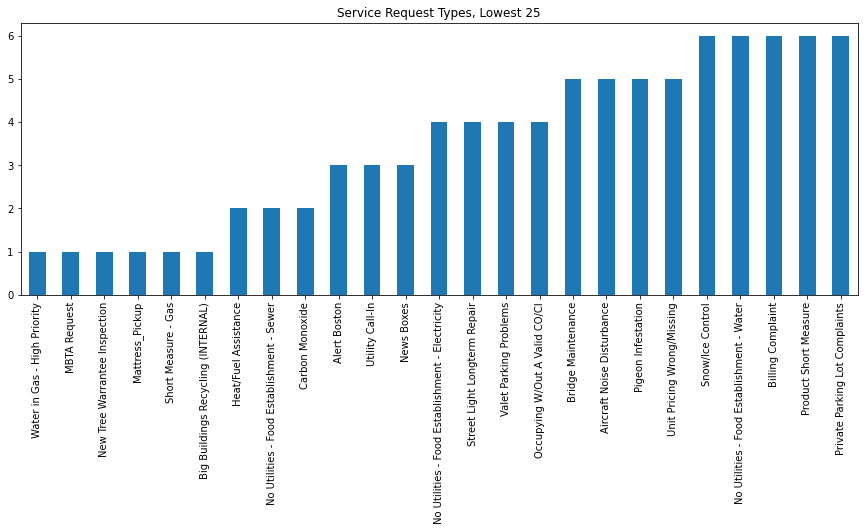

In [43]:
plt.figure(figsize=(15, 5))
counts.sort_values(ascending=True)[:25].plot(kind='bar')
plt.title("Service Request Types, Lowest 25")
plt.show()

In [46]:
counts = df_311['neighborhood'].value_counts()
print(counts)

Dorchester                                      36038
South Boston / South Boston Waterfront          21541
Roxbury                                         21501
Allston / Brighton                              17584
East Boston                                     17494
South End                                       17219
Downtown / Financial District                   15214
Jamaica Plain                                   14578
Back Bay                                        12664
Greater Mattapan                                 9969
Hyde Park                                        9426
Roslindale                                       9034
Boston                                           8989
Charlestown                                      8704
West Roxbury                                     8148
Beacon Hill                                      8010
Mission Hill                                     5051
Fenway / Kenmore / Audubon Circle / Longwood     5021
South Boston                

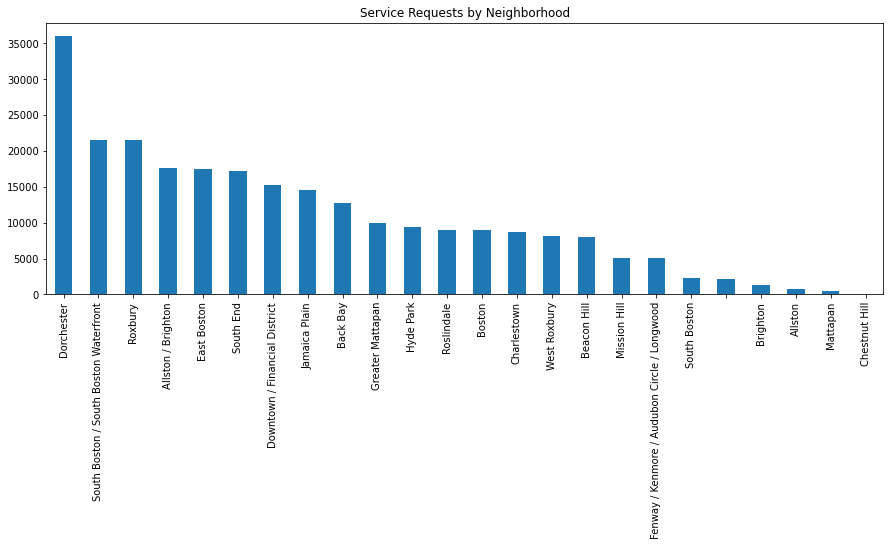

In [47]:
plt.figure(figsize=(15, 5))
counts.sort_values(ascending=False)[:25].plot(kind='bar')
plt.title("Service Requests by Neighborhood")
plt.show()

## Analysis by All Neighborhoods

In [95]:
def plotbar_bynbr(nbr):
    by_nbr = df_311[df_311['neighborhood'] == nbr]
    counts = by_nbr['type'].value_counts()
    plt.figure(figsize=(10, 5))
    counts.sort_values(ascending=False)[:10].plot(kind='bar')
    plt.title(nbr + ": Service Request Types, Top 10")
    plt.show()

In [80]:
nbrs = df_311['neighborhood'].unique()

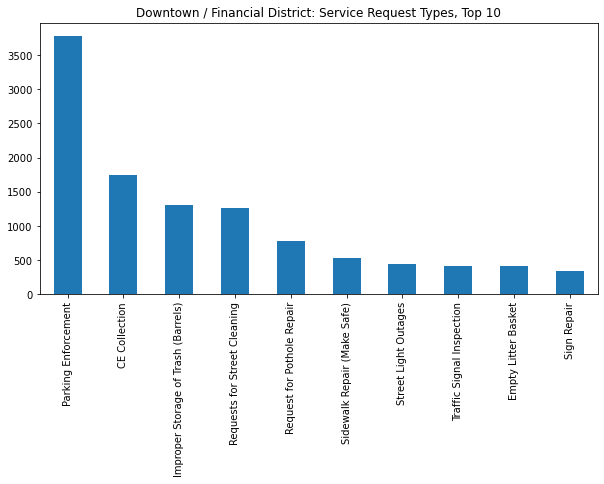

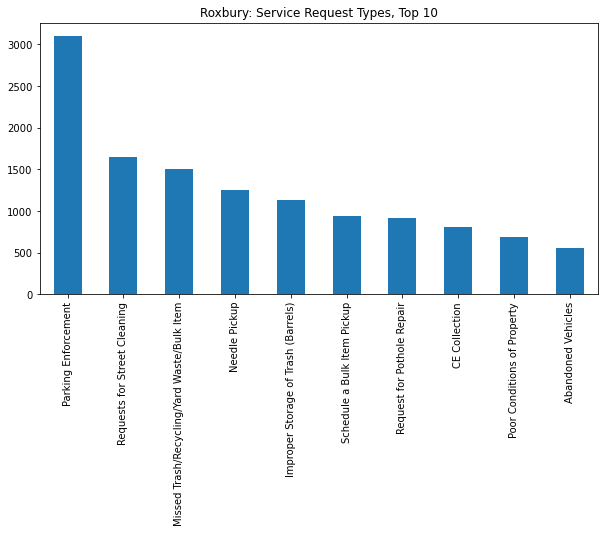

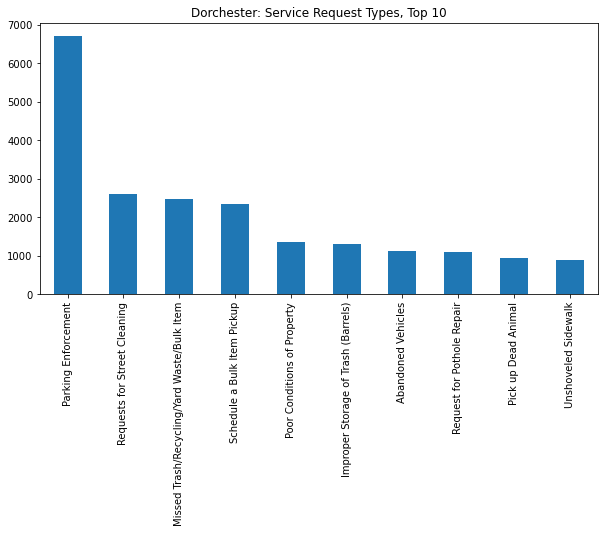

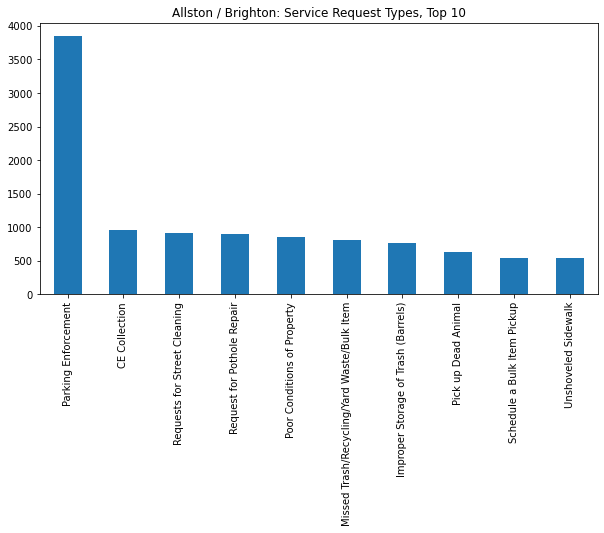

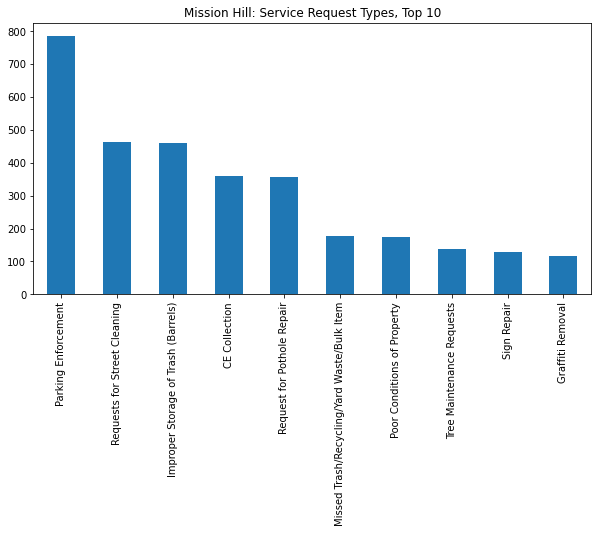

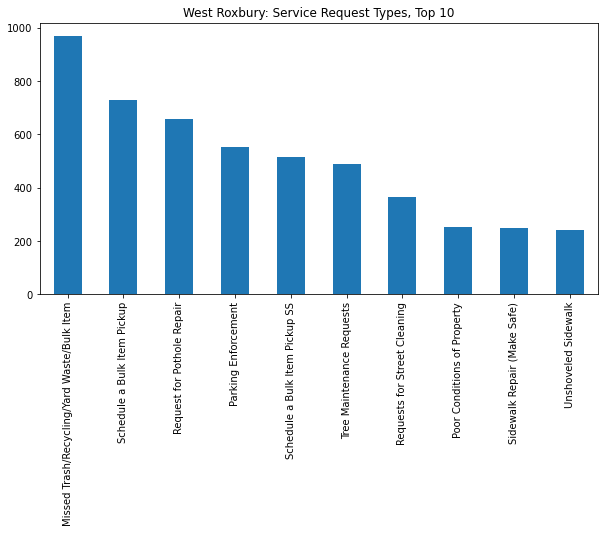

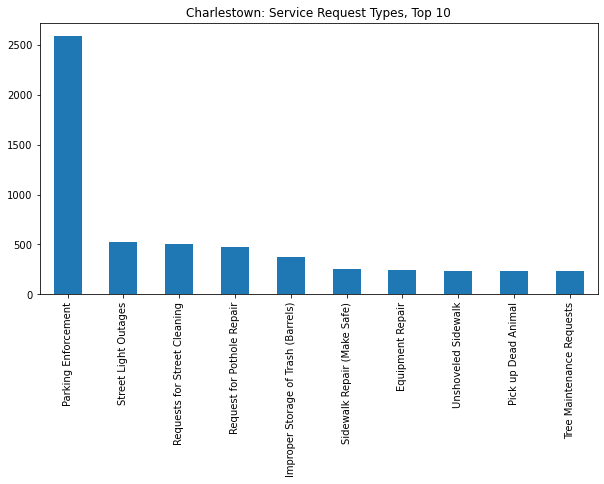

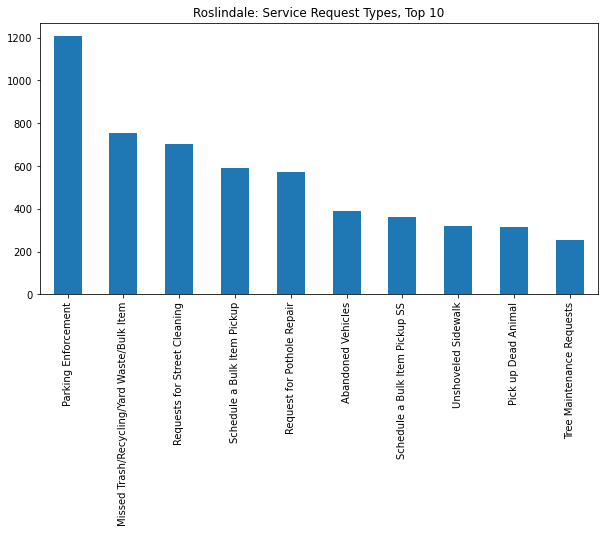

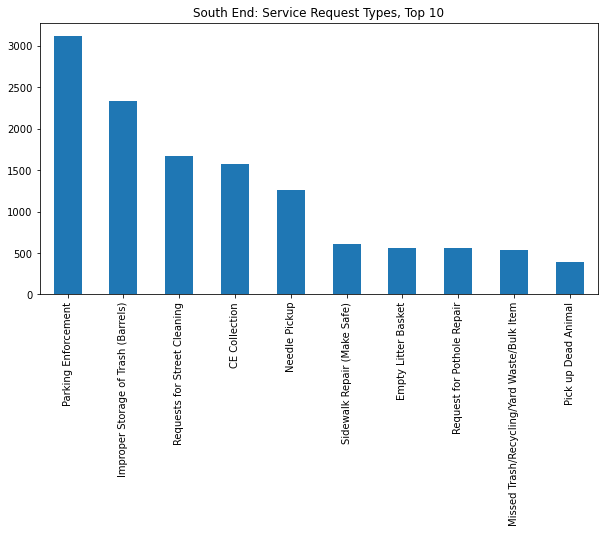

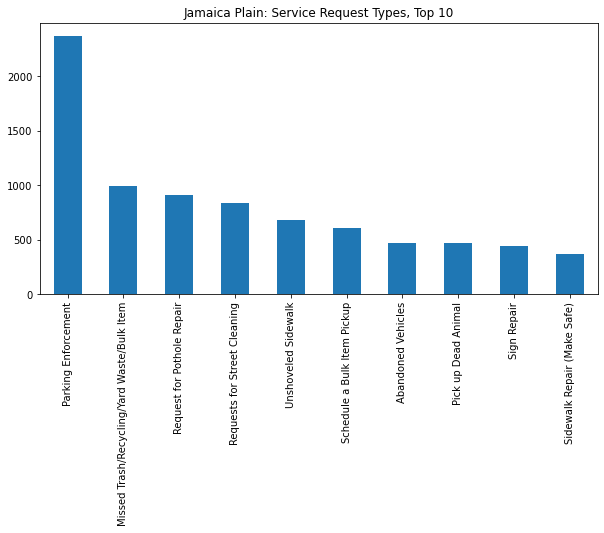

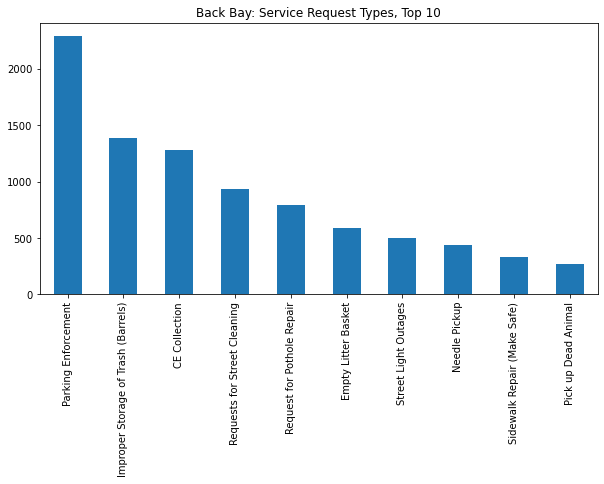

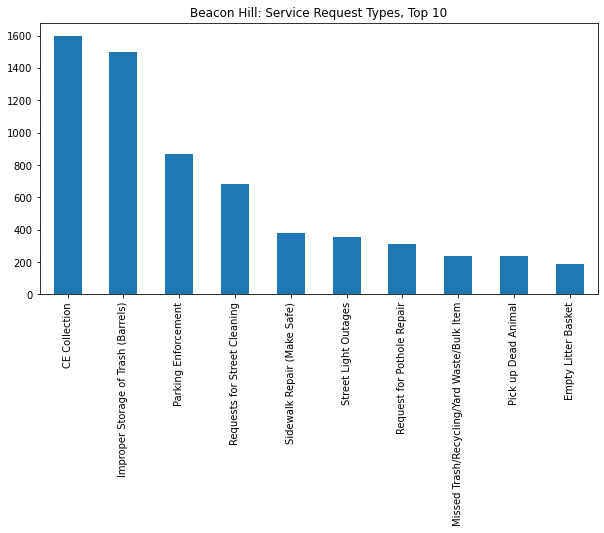

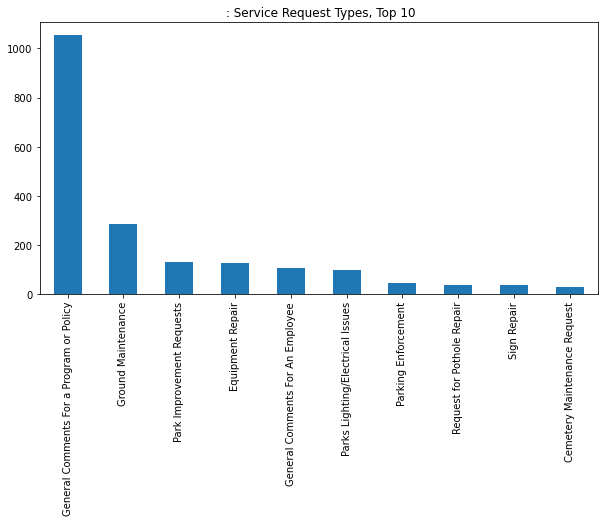

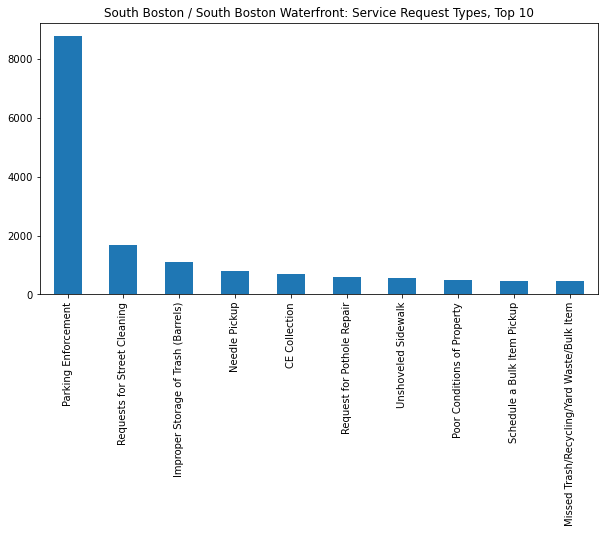

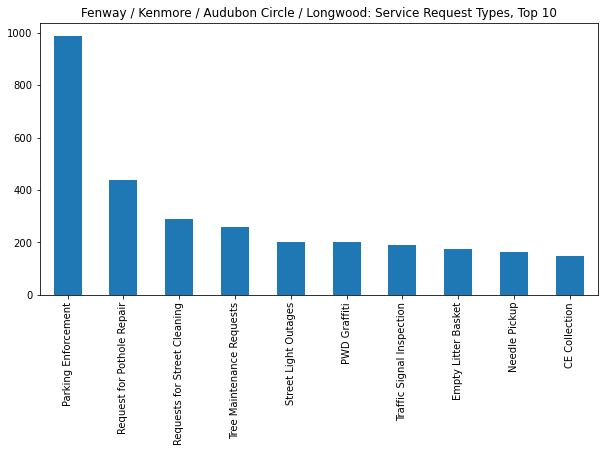

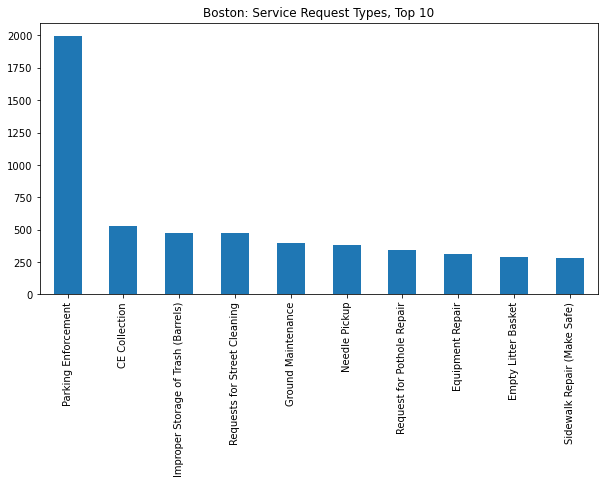

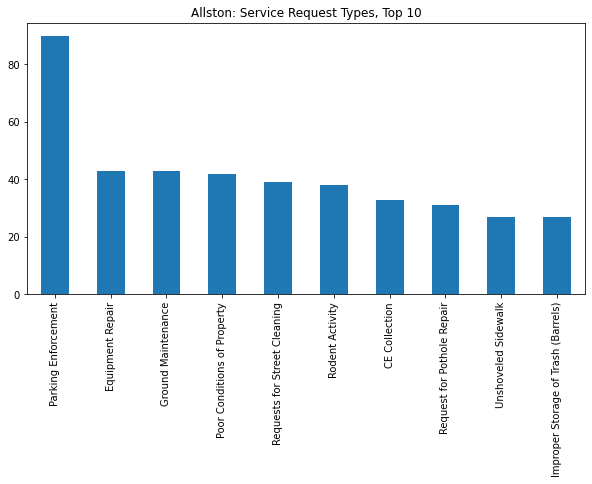

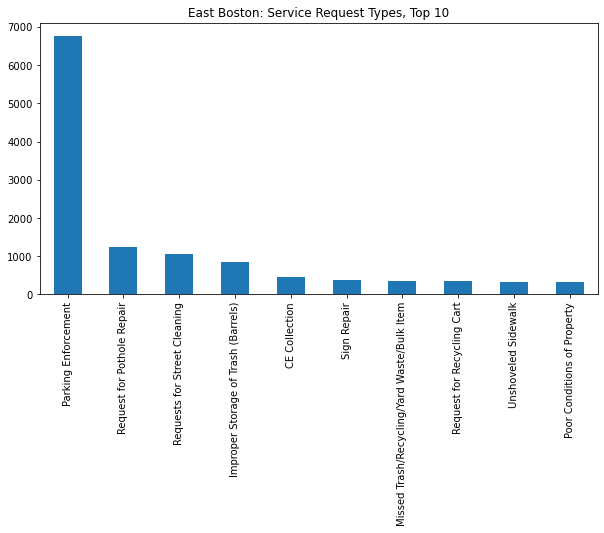

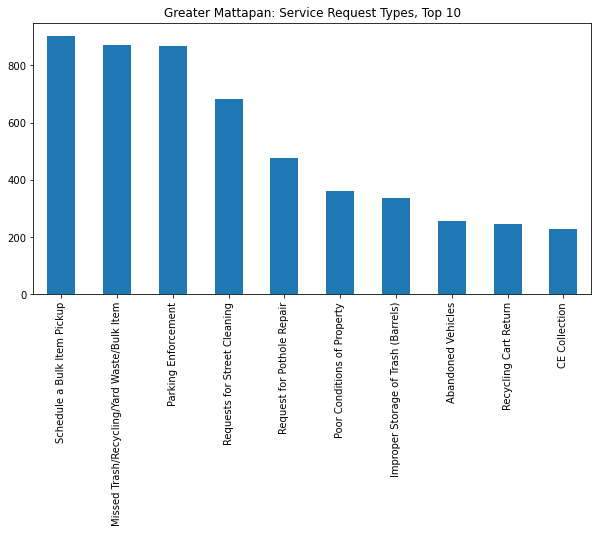

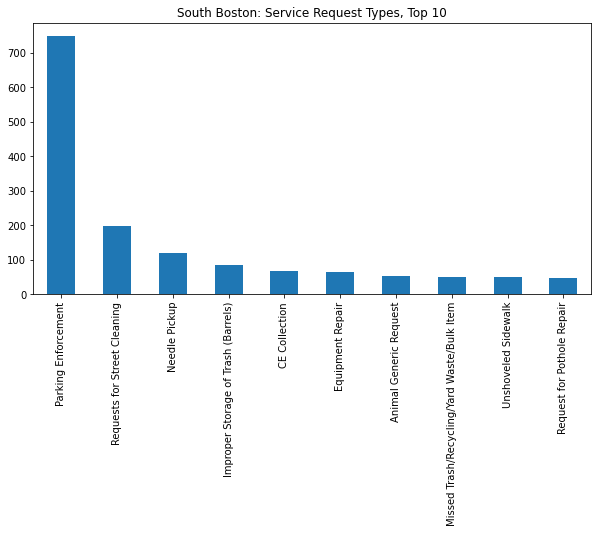

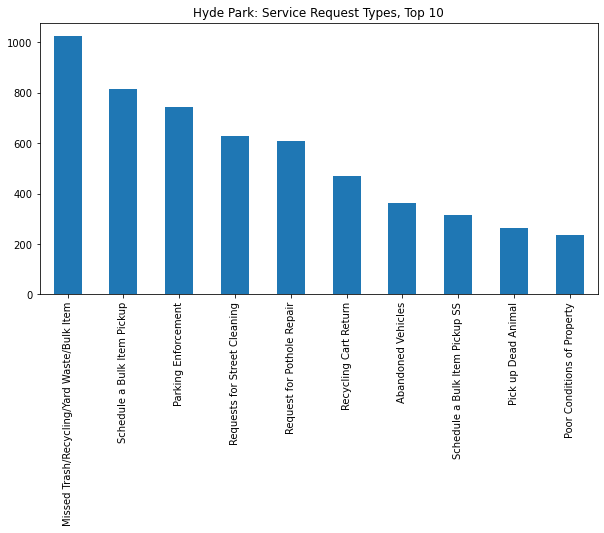

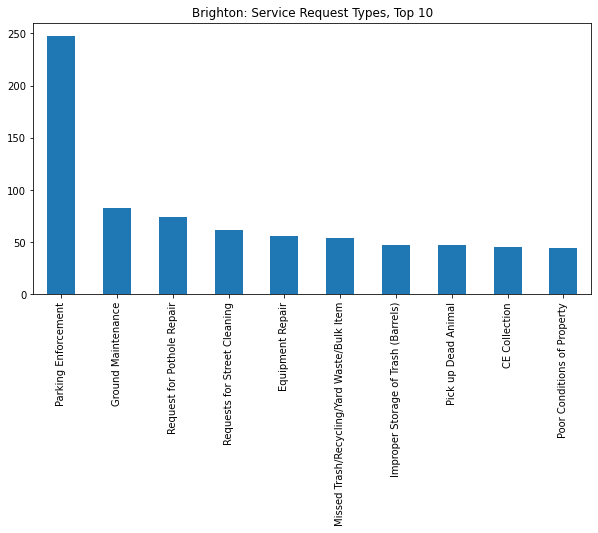

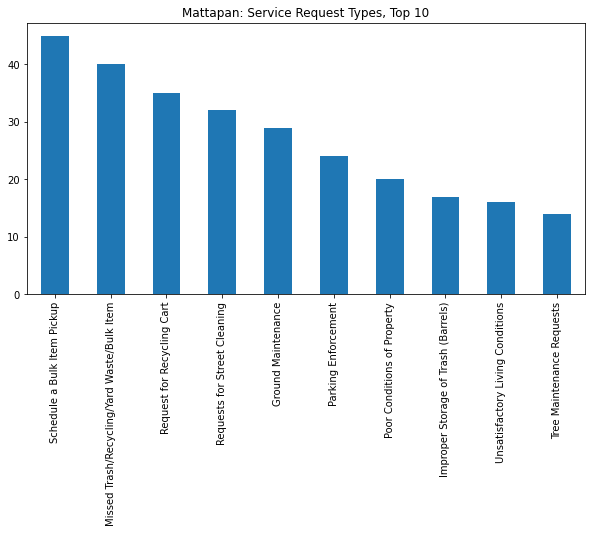

IndexError: index 0 is out of bounds for axis 0 with size 0

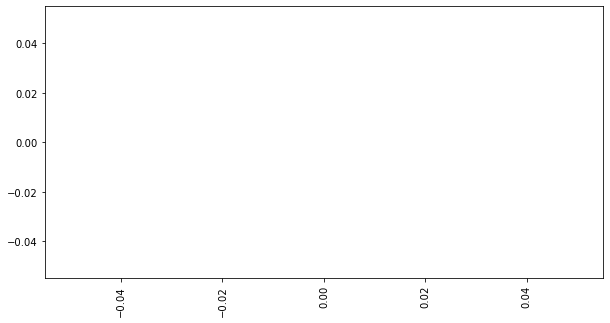

In [96]:
for n in nbrs:
    plotbar_bynbr(n)

## Analysis by Type, Top 10 Most Popular

In [119]:
def plotbar_bytype(type):
    by_type = df_311[df_311['type'] == type]
    counts = by_type['neighborhood'].value_counts()
    plt.figure(figsize=(10, 5))
    counts.sort_values(ascending=False)[:10].plot(kind='bar')
    plt.title(type + ": Count by Neighborhood, Top 10")
    plt.show()

In [120]:
type_counts = df_311['type'].value_counts()[:10]
types = type_counts.keys()

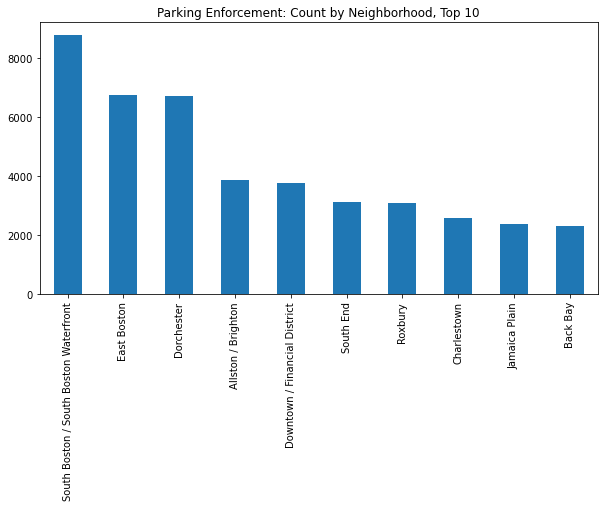

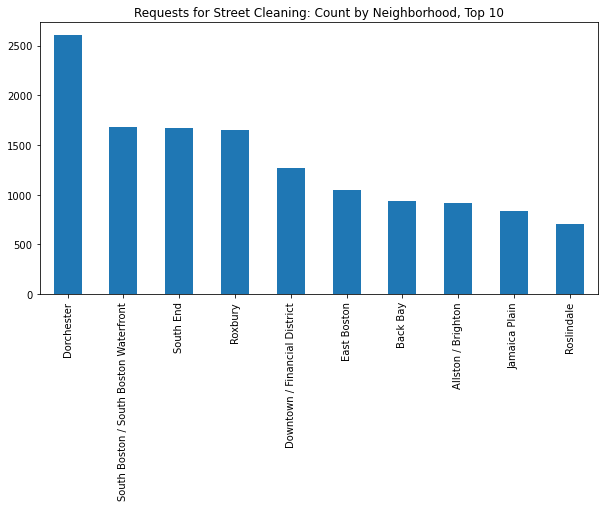

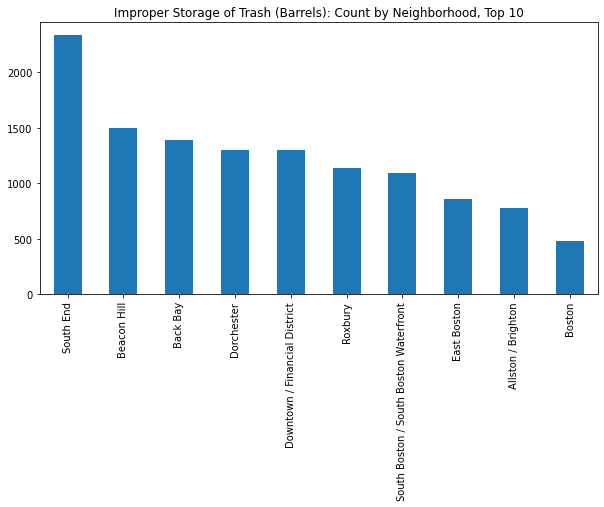

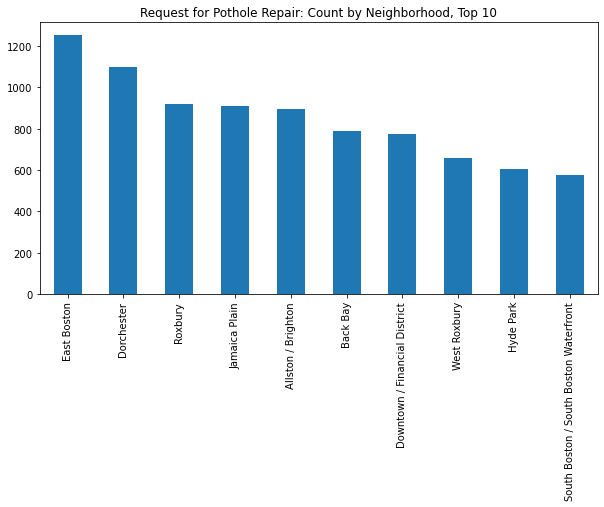

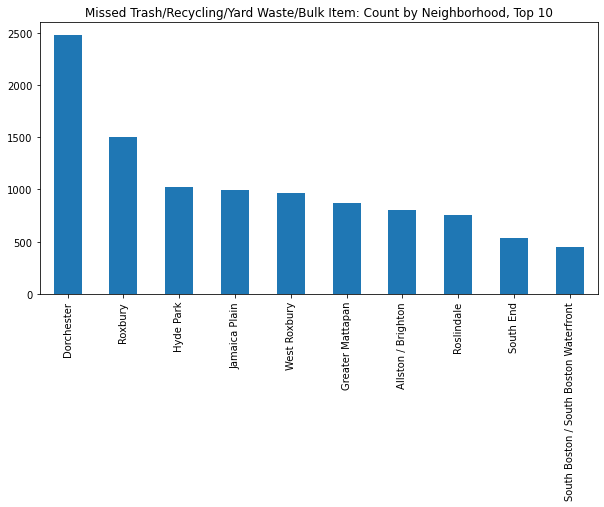

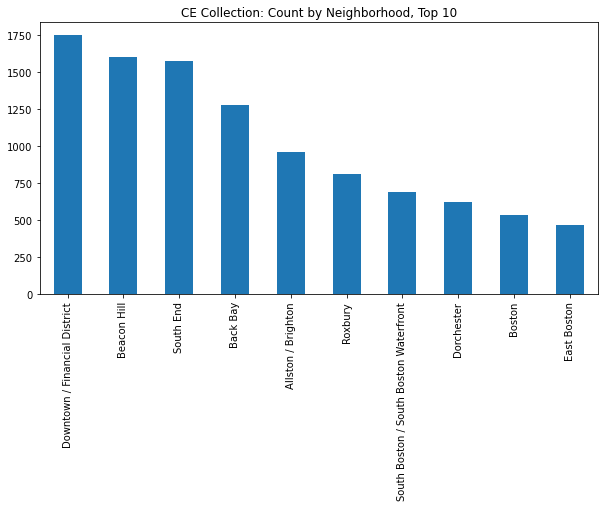

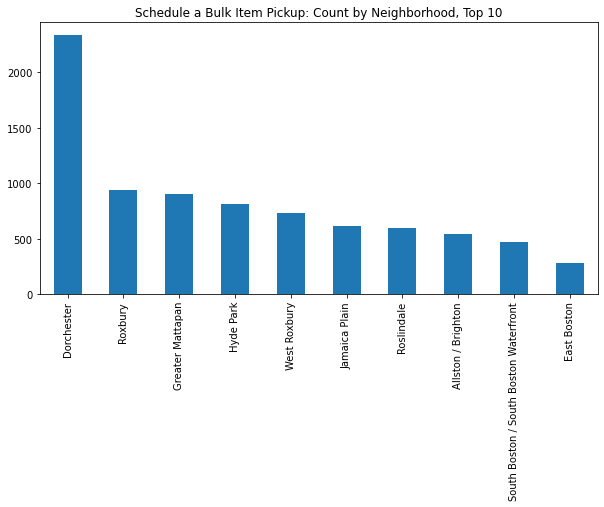

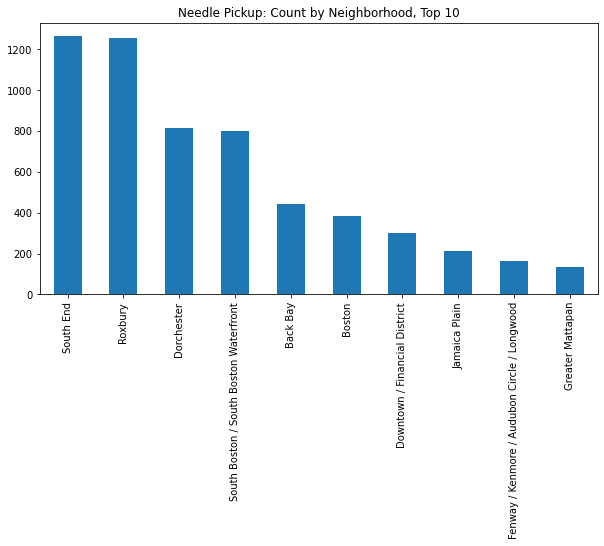

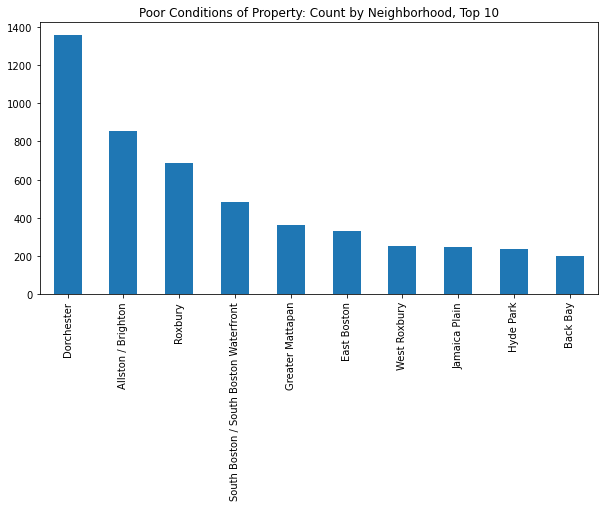

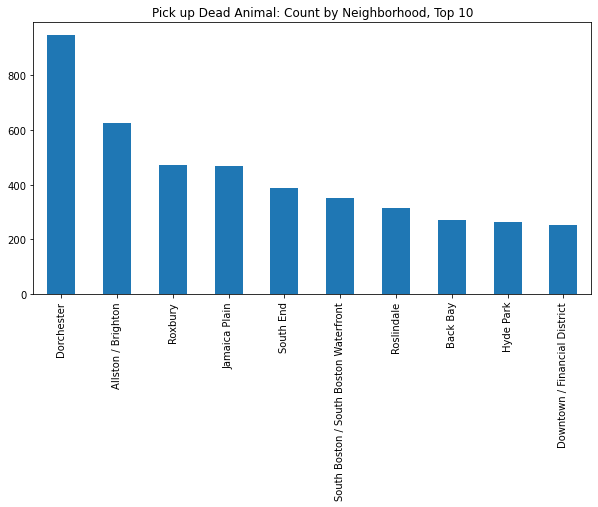

In [121]:
for t in types:
    plotbar_bytype(t)

## Map of All 2022 Service Requests

In [60]:
bost_map=folium.Map(location=[42.3601, -71.0589], zoom_start = 11)

# Ensure you're handing it floats
df_311['latitude'] = df_311['latitude'].astype(float)
df_311['longitude'] = df_311['longitude'].astype(float)

# Remove NaNs, if any
heat_df = df_311[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(bost_map)

# Display the map
bost_map